In [1]:
import lightkurve as lk
from apertureoptimizer import ApertureOptimizer
%load_ext autoreload
% autoreload 2




# Download KOI 6.01, an exoplanet False Positive
tpf = lk.search_targetpixelfile('Kepler-4', quarter=10).download()

# Define a corrector function
def corrector(lc):
    clc = lc.copy().flatten(81, niters=3, sigma=3).remove_outliers(sigma_upper=2, sigma_lower=10)
    return clc

In [2]:
period = 3.21346
t0 = 2454956.6127 - 2454833
duration =  0.1663979

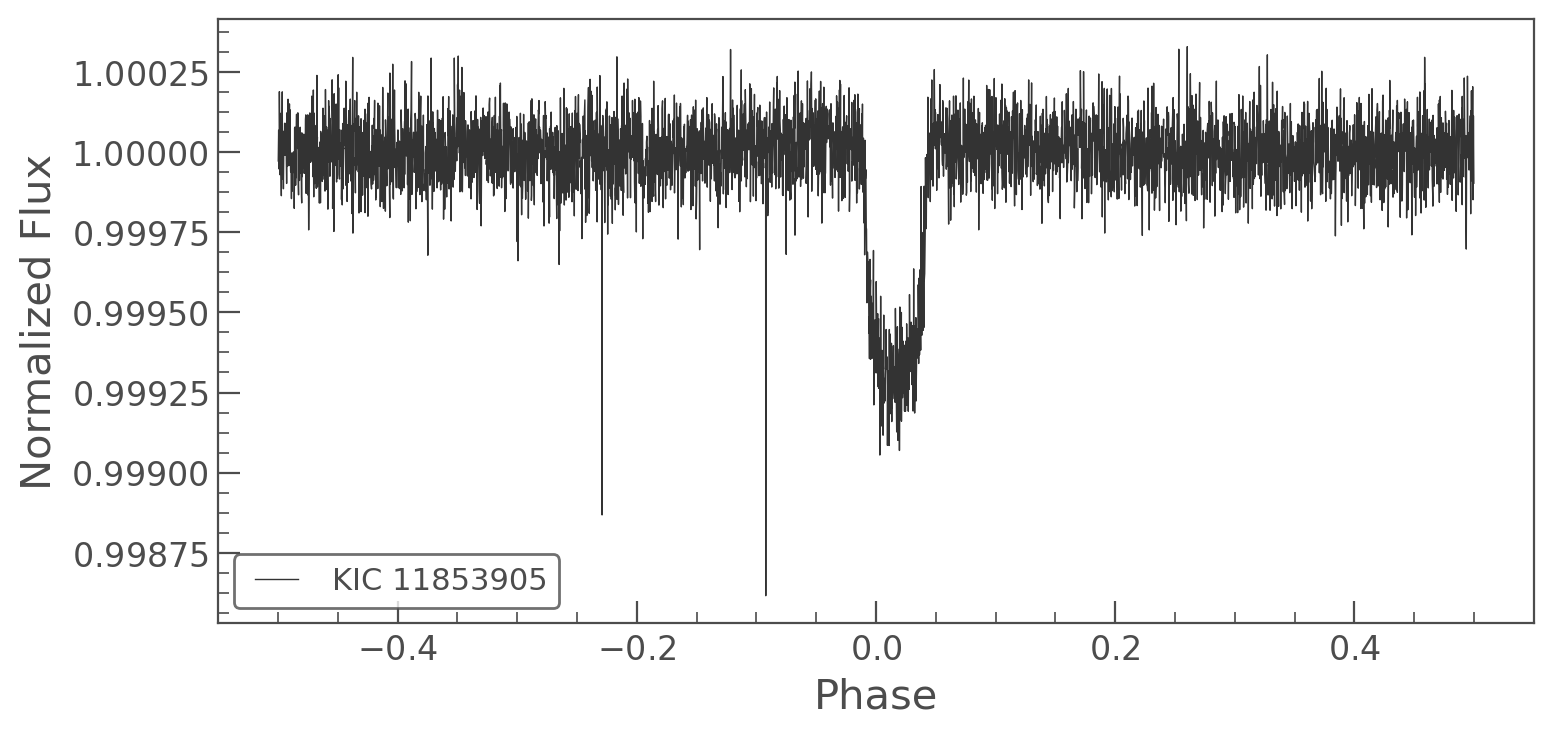

In [3]:
corrector(tpf.to_lightcurve()).fold(period, t0).plot()

Searching Neighbours...:  89%|████████▉ | 50/56 [00:34<00:04,  1.45it/s]

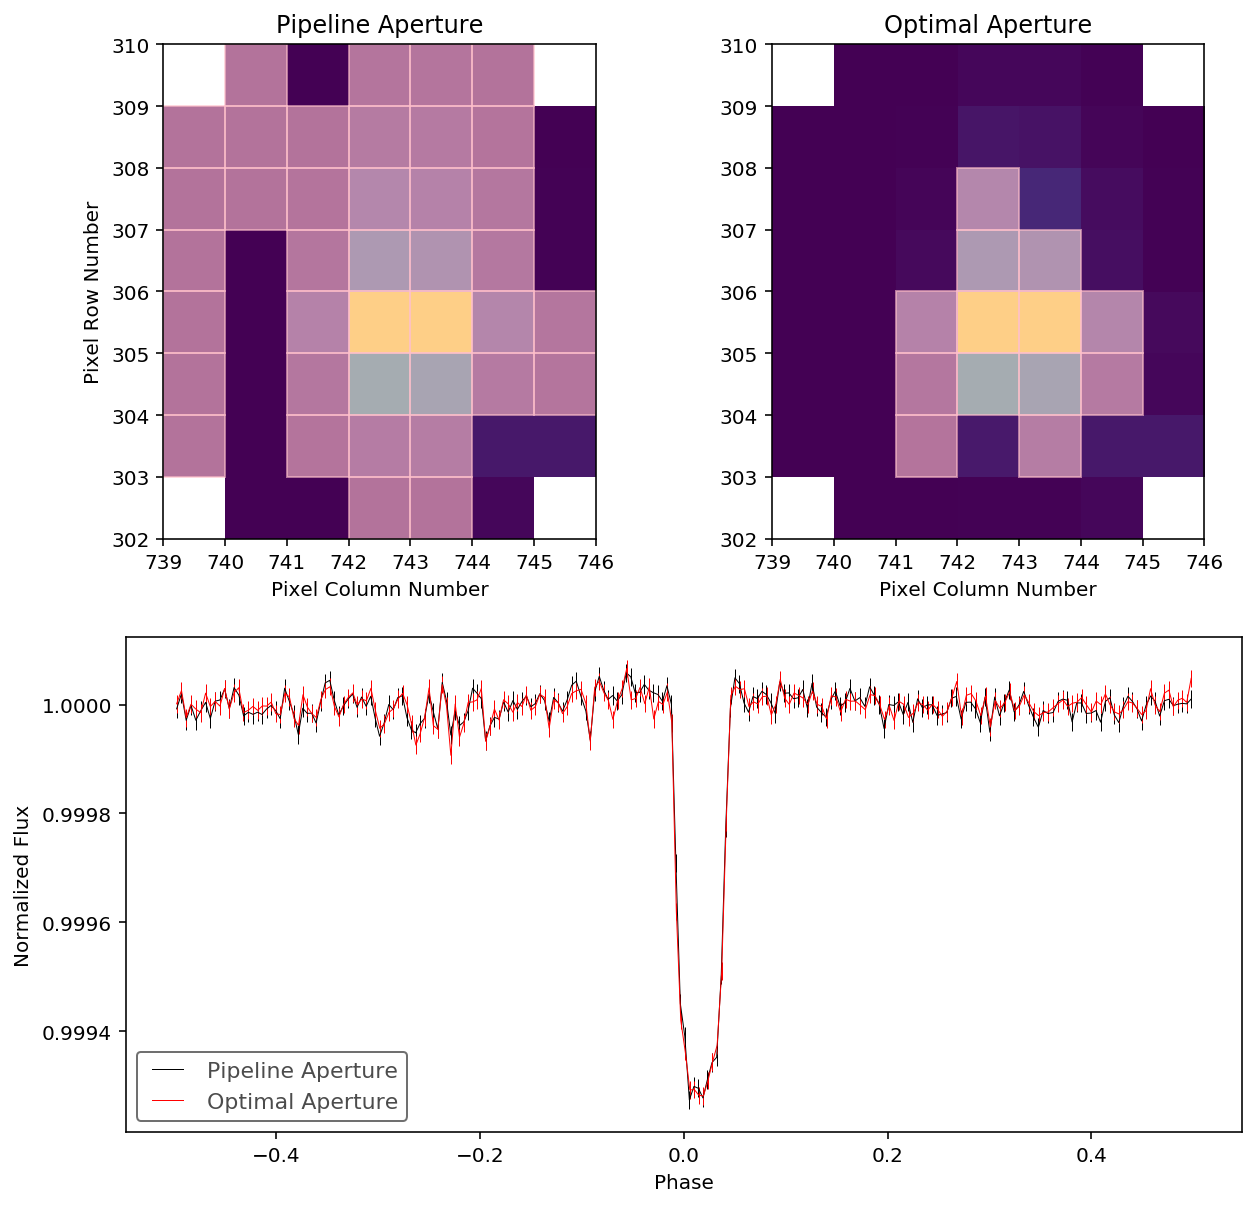

In [4]:
# Make an ApertureOptimizer Class, pass in the False Positive parameters
a = ApertureOptimizer(tpf, period, t0, duration, corrector=corrector)

# Optimize the aperture
a.optimize()

# Plot the results
a.plot_results()

# Use the best light curve as you normally would.
lc = a.best_lc

(-0.1, 0.1)

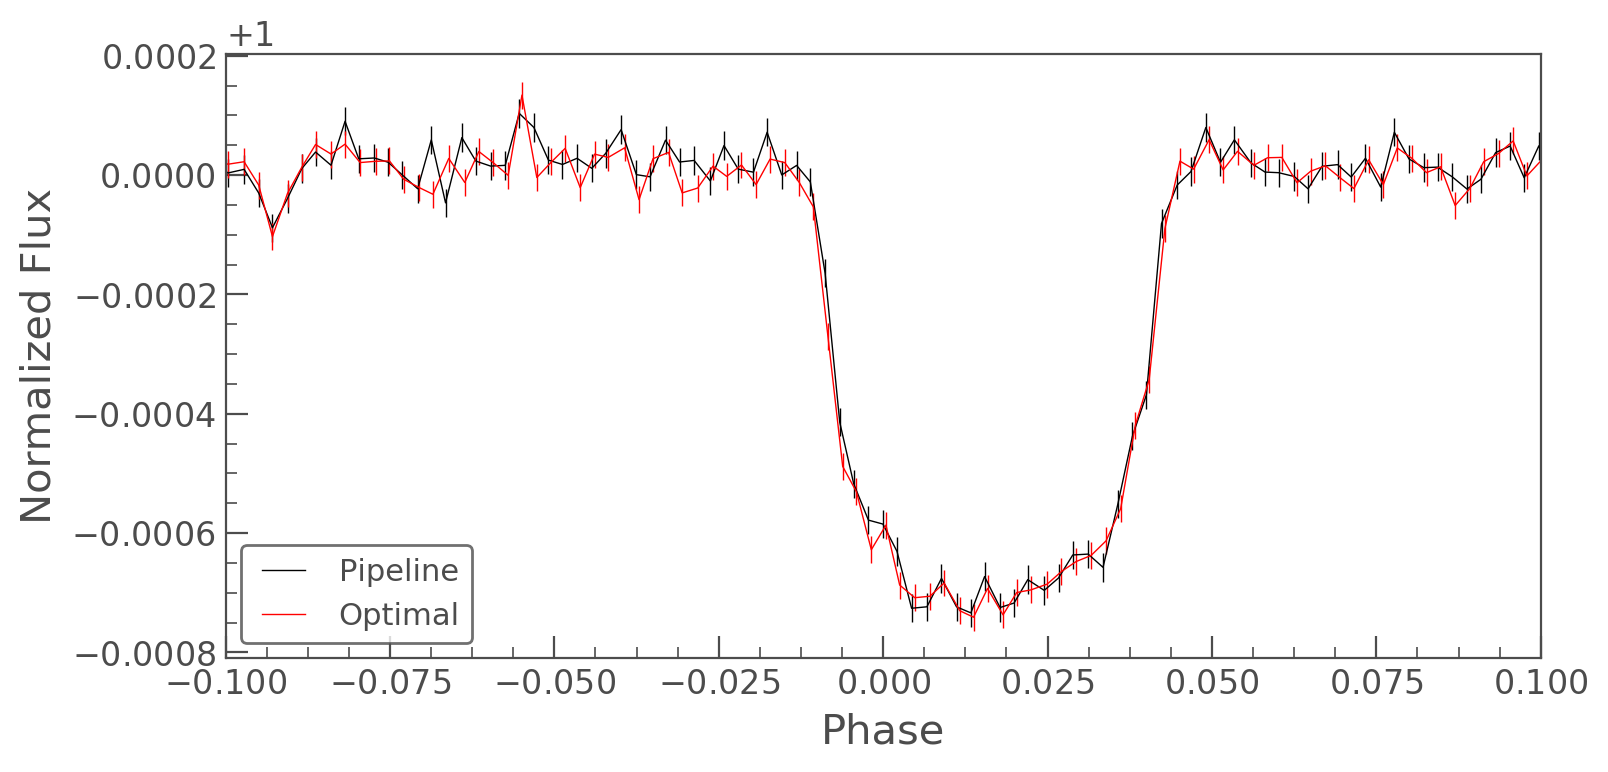

In [5]:
import matplotlib.pyplot as plt
ax = a.starting_lc.fold(period, t0).bin(10).errorbar(c='k', label='')
a.starting_lc.fold(period, t0).bin(10).plot(c='k', ax=ax, label='Pipeline')


a.best_lc.fold(period, t0).bin(10).errorbar(ax=ax, c='r', label='')
a.best_lc.fold(period, t0).bin(10).plot(ax=ax, c='r', label='Optimal')


plt.xlim(-0.1, 0.1)